## Ejercicio Práctico: SVM

### Paso 1: Importar las librerias

In [1]:
### Instalamos ELI 5
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=447f7770a44f6319aa69e8c6bb7641e9290f8742ce3854245ef45ed9313c9420
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [2]:
# Libreria para operaciones matemáticas o estadísticas
import numpy as np
# Libreria para el manejo de datos
import pandas as pd
# Librerías para gráficas
import seaborn as sb
import matplotlib.pyplot as plt
# Libreria de árbol de regresión para realizar pruebas con Eli5
from sklearn.tree import DecisionTreeRegressor
# Libreria para las mejores características Eli5
from eli5 import show_weights
# Libreria para dividir los datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Libreria para SVM con regresión
from sklearn.svm import SVR
# Se importa la libreria para la métrica R cuadrado y RMSE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Paso 2: Cargar los datos a un DataFrame

In [3]:
# Se cargan los datos de entrada
data = pd.read_csv("data/2.3-glifosato.csv", sep=";")
# Se observa la cantidad de registros y columnas del archivo
data.shape

(626, 9)

### Paso 3: Preprocesamiento de los datos

In [4]:
# Se buscan registros NaN para eliminarlos
print('Columna           Cantidad NaN')
print(data.isnull().sum(axis = 0))
print(data.shape)

Columna           Cantidad NaN
date(m/d/y)        0
time               0
day                0
concentration      0
chloride(mg/L)     0
DO(mg/L)           0
ORP(mV)            0
pH                 0
turbidity(NTU+)    0
dtype: int64
(626, 9)


In [ ]:
# Se eliminan los registros NaN del DataFrame
#data = data.dropna()
#data.shape

##### Nota: Como no existen registros NaN no es necesario utilizar 'dropna()'

In [5]:
# Se observan los primeros registros
data.head()

,date(m/d/y),time,day,concentration,chloride(mg/L),DO(mg/L),ORP(mV),pH,turbidity(NTU+)
0,25/01/05,12.30,1,0.0,17.02,13.17,747,8.68,0.1
1,25/01/05,12.31,1,0.0,17.12,13.20,747,8.67,0.1
2,25/01/05,12.32,1,0.0,17.12,13.25,747,8.68,0.1
3,25/01/05,12.33,1,0.0,17.11,13.19,747,8.68,0.1
4,25/01/05,12.34,1,0.0,17.03,13.20,747,8.68,0.1


In [6]:
# Se observan las estadísticas de los datos, para valores numéricos
data.describe()

,time,day,concentration,chloride(mg/L),DO(mg/L),ORP(mV),pH,turbidity(NTU+)
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,13.869968,1.504792,1.161981,17.323882,13.348083,739.704473,8.652077,0.068371
std,1.857436,0.500377,1.164567,0.511636,0.133306,7.442400,0.091153,0.101617
min,10.050000,1.000000,0.000000,16.550000,12.980000,717.000000,8.240000,-0.100000
25%,12.562500,1.000000,0.000000,16.880000,13.280000,737.000000,8.650000,0.000000
50%,14.120000,2.000000,0.400000,17.105000,13.400000,740.000000,8.670000,0.000000
75%,15.287500,2.000000,1.500000,17.880000,13.450000,746.000000,8.700000,0.100000
max,17.300000,2.000000,3.000000,18.350000,13.530000,753.000000,8.730000,0.500000


<ipython-input-8-9aef1d471a2a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['time','day','concentration'], 1).hist()


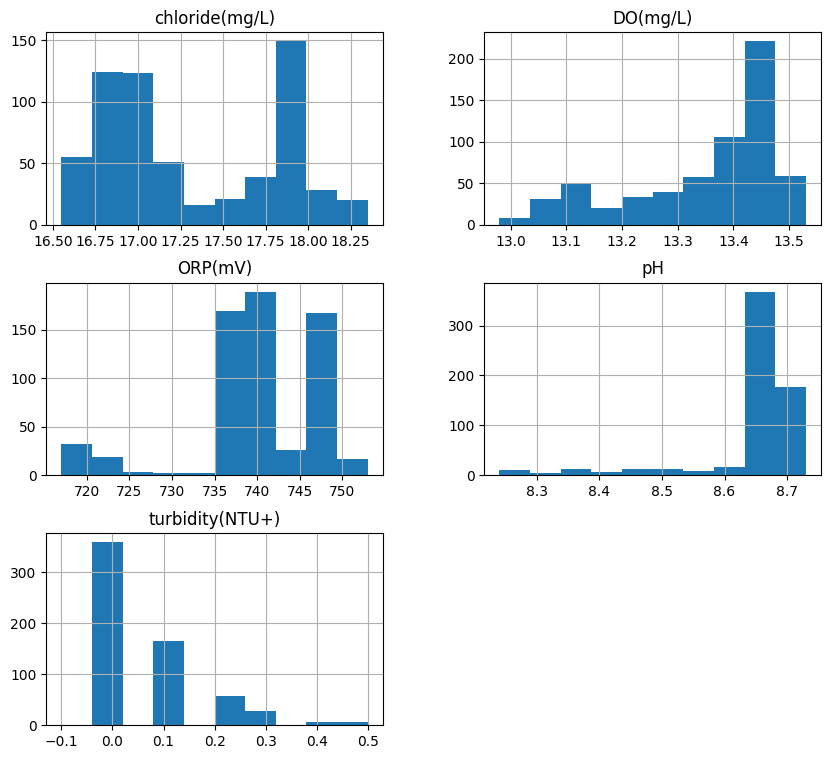

In [8]:
# Visualizo las características de la entrada en un histograma, sin las columnas: time, day, concentration
data.drop(['time','day','concentration'], 1).hist()
plt.rcParams['figure.figsize'] = (10,9)
plt.show()

### Paso 4: Selección de las mejores características

Antes de generar la predicción se debe:

* Seleccionar las mejores características para el modelo
* Separar los datos de entrenamiento y de pruebas
* Generar la predicción
* Obtener los valores para las métricas

In [9]:
# Se seleccionan todas las características:
features = ['chloride(mg/L)', 'DO(mg/L)', 'ORP(mV)', 'pH', 'turbidity(NTU+)']
X = data[features]
# Variable Objetivo
y = data['concentration']

# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

# Se crea el modelo
dtr = DecisionTreeRegressor()
# Se entrena el modelo
dtr.fit(X_train, y_train)
# Se genera la predicción
prediccion = dtr.predict(X = X_test)

# Técnica de mejores características con Eli5 (con todas las características)
show_weights(dtr, feature_names = features)

/usr/local/lib/python3.10/dist-packages/eli5/sklearn/treeinspect.py:64: RuntimeWarning: invalid value encountered in divide
  value_ratio=list(value / value.sum()),


Weight,Feature
0.3517,DO(mg/L)
0.2704,ORP(mV)
0.1719,pH
0.1715,chloride(mg/L)
0.0346,turbidity(NTU+)


### Paso 5: Predicción con mejores características y SVM

In [10]:
# Se seleccionan las mejores características por su peso: DO(mg/L), ORP(mV), pH, chloride(mg/L)
features = ['DO(mg/L)', 'ORP(mV)', 'pH', 'chloride(mg/L)']
X = data[features]
# Variable Objetivo
y = data['concentration']

# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

# Se crea el modelo con SVM
svr = SVR()
# Se entrena el modelo
svr.fit(X_train, y_train)
# Se genera la predicción
prediccion = svr.predict(X = X_test)

# Métricas
# Se utiliza la métrica: R2
print('R2-árbol de regresión:',  r2_score(y_test, prediccion))
# Se utiliza la métrica: raíz del error cuadrático medio (rmse)
rmse = mean_squared_error( y_true  = y_test, y_pred  = prediccion, squared = False)
print('RMSE-árbol de regresión:', rmse)
# Se utiliza la métrica: MAE
mae = mean_absolute_error(y_test, prediccion)
print('MAE-árbol de regresión:', mae)

R2-árbol de regresión: -0.34044483659769953
RMSE-árbol de regresión: 1.4202423455224717
MAE-árbol de regresión: 1.080533257702623


##### Nota: A partir de las mejores características se genera la predicción. De momento el modelo no alcanzó muy buenos resultados para las métricas seleccionadas, pero en el siguiente ejemplo (Random Forest) aplicaremos Hiperparámatros para mejorar los resultados del modelo.